# Xinyue Jiang

In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Import des données de température de ville

In [3]:
data = pd.read_csv('./villes.csv', sep=';')

In [4]:
data.head(3)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3


In [5]:
X = data.iloc[:, 1:13].values

In [6]:
labels = data.iloc[:, 0].values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss=StandardScaler()
##### une création de l'object
ss.fit(X)
##### calcule le moyen et l'écart-type
Xnorm=ss.transform(X)
##### transformation de valeur

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
X_pca = pca.fit(Xnorm).transform(Xnorm)  

In [11]:
pca.explained_variance_ratio_
#il affiche à chaque fois la representation de chaque component

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

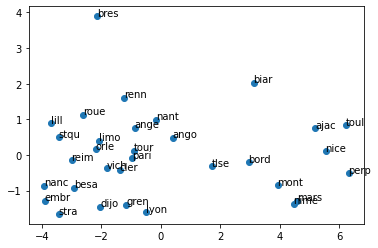

In [12]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [13]:
#pca.components_

### Import les donnees de crimes

In [26]:
data_c = pd.read_csv('./crimes.csv', sep=';')

In [27]:
X_c = data_c.iloc[:, 1:9].values
labels_c = data_c.iloc[:, 0].values

In [28]:
ss_c=StandardScaler()
ss_c.fit(X_c)
##### calcule le moyen et l'écart-type
Xnorm_c=ss_c.transform(X_c)
##### transformation de valeur

In [29]:
pca_c = PCA()
X_pca_c = pca_c.fit(Xnorm_c).transform(Xnorm_c) 
pca_c.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

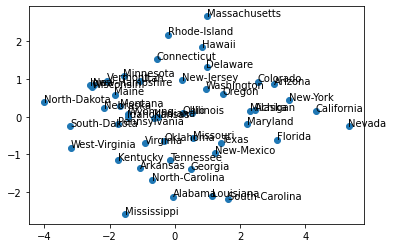

In [30]:
plt.scatter(X_pca_c[:, 0], X_pca_c[:, 1])
for labels_c, x, y in zip(labels_c, X_pca_c[:, 0], X_pca_c[:, 1]):
    plt.annotate(labels_c, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

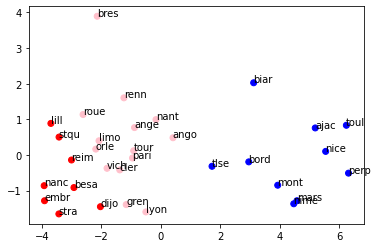

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
clustering=kmeans.labels_

colors = ['red','yellow','blue','pink']

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

